In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/german-bank-credit-data/German Bank Segmentation./german_credit_data.csv')

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [3]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [4]:
# Replace missing values with appropriate strategies (e.g., mean, mode)
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)
data['Checking account'].fillna(data['Checking account'].mode()[0], inplace=True)

# Verify that missing values are handled
print(data.isnull().sum())

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [5]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


**How can we visualize the distribution of 'Age' in the dataset?**

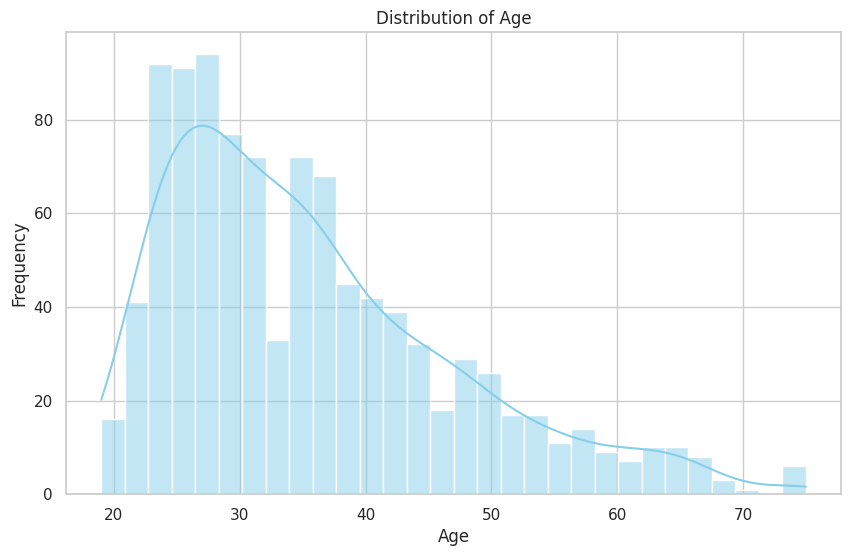

In [6]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Create a histogram for the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**How can we explore the distribution of 'Credit amount' and 'Duration'?**

<Figure size 1200x800 with 0 Axes>

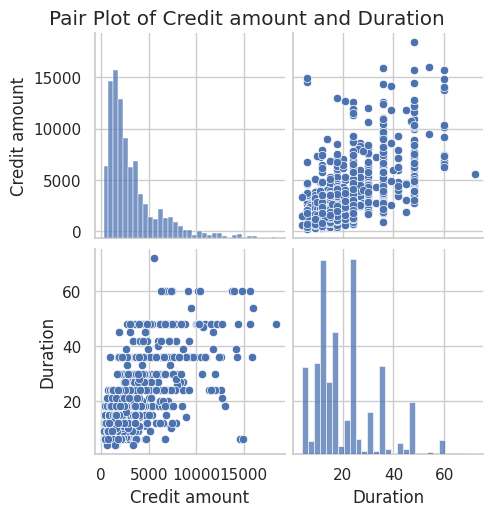

In [7]:
# Create a pair plot to explore the relationship between 'Credit amount' and 'Duration'
plt.figure(figsize=(12, 8))
sns.pairplot(data[['Credit amount', 'Duration']])
plt.suptitle('Pair Plot of Credit amount and Duration', y=1.02)
plt.show()


**What is the distribution of 'Credit amount' based on 'Purpose'?**

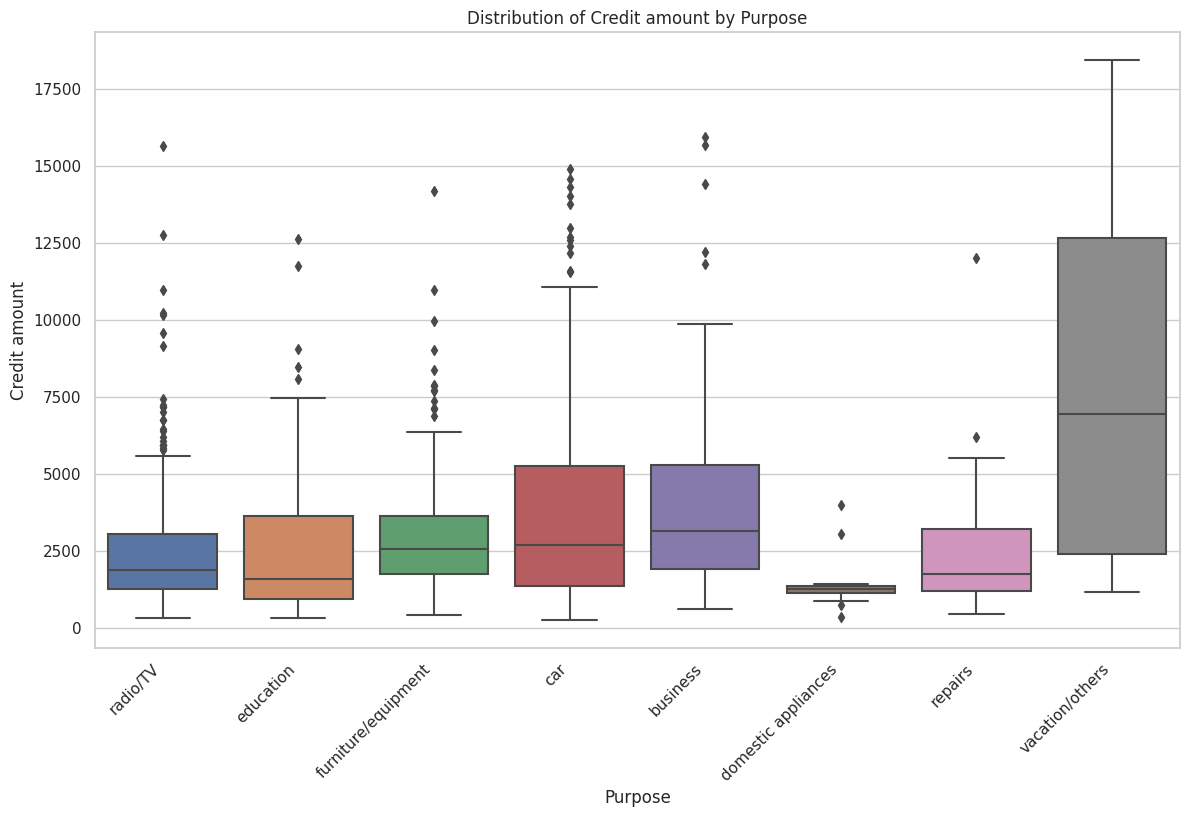

In [8]:
# Create a boxplot to show the distribution of 'Credit amount' based on 'Purpose'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Purpose', y='Credit amount', data=data)
plt.title('Distribution of Credit amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Credit amount')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can we explore the distribution of 'Job' categories?**

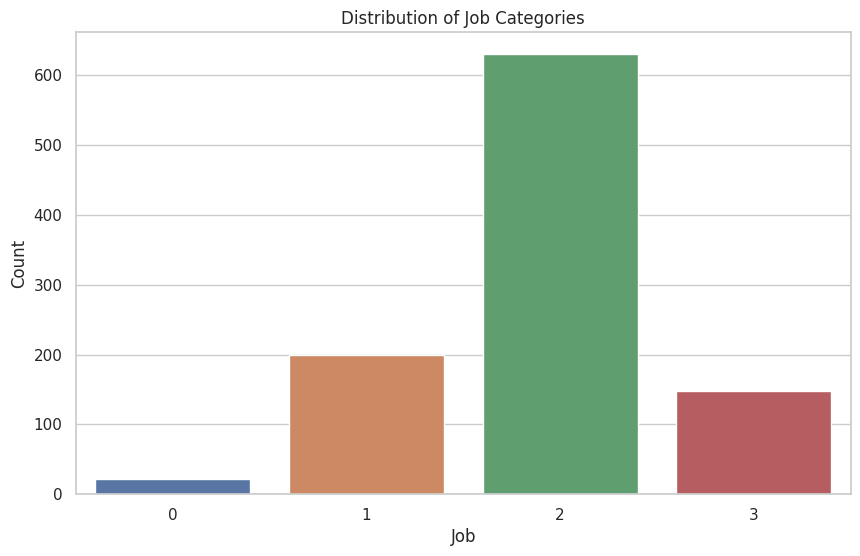

In [9]:
# Create a count plot to explore the distribution of 'Job' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Job', data=data)
plt.title('Distribution of Job Categories')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


**How can we visualize the proportion of 'Sex' in the dataset?**

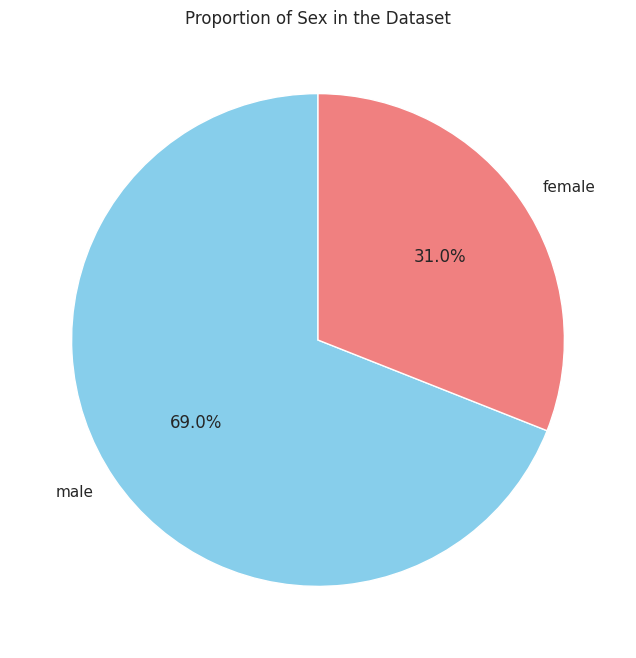

In [10]:
# Create a pie chart to visualize the proportion of 'Sex' in the dataset
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Sex in the Dataset')
plt.show()


**How can we explore the relationship between 'Credit amount' and 'Age'?**

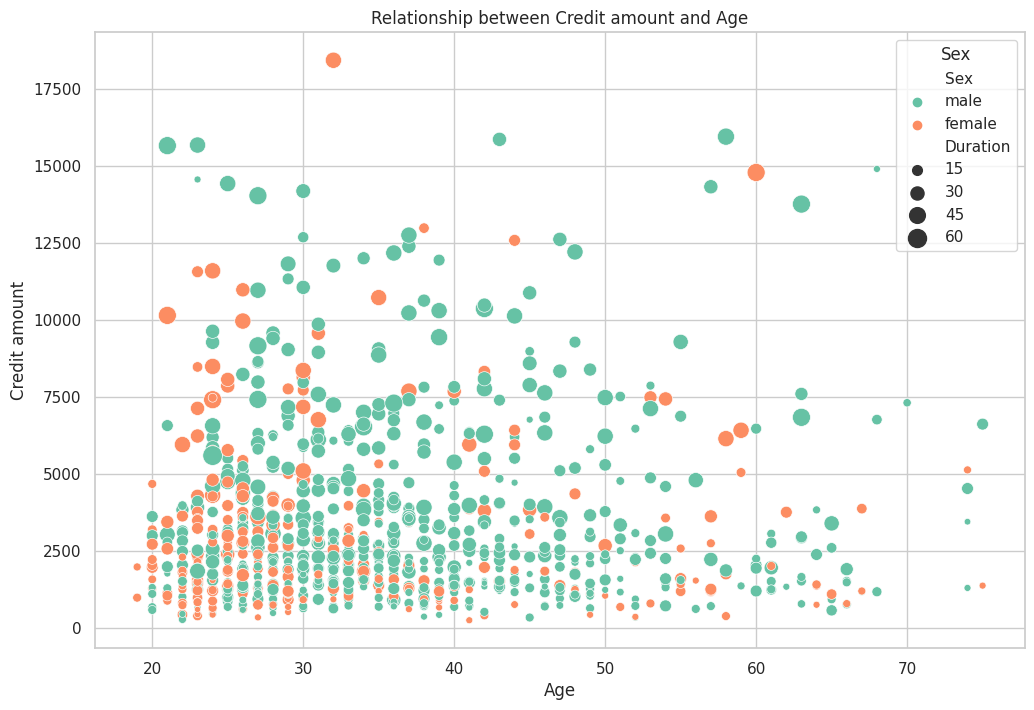

In [11]:
# Create a scatter plot to explore the relationship between 'Credit amount' and 'Age'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Credit amount', data=data, hue='Sex', palette='Set2', size='Duration', sizes=(20, 200))
plt.title('Relationship between Credit amount and Age')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.legend(title='Sex', loc='upper right')
plt.show()


**Can we analyze the distribution of 'Saving accounts' and 'Checking account'?**

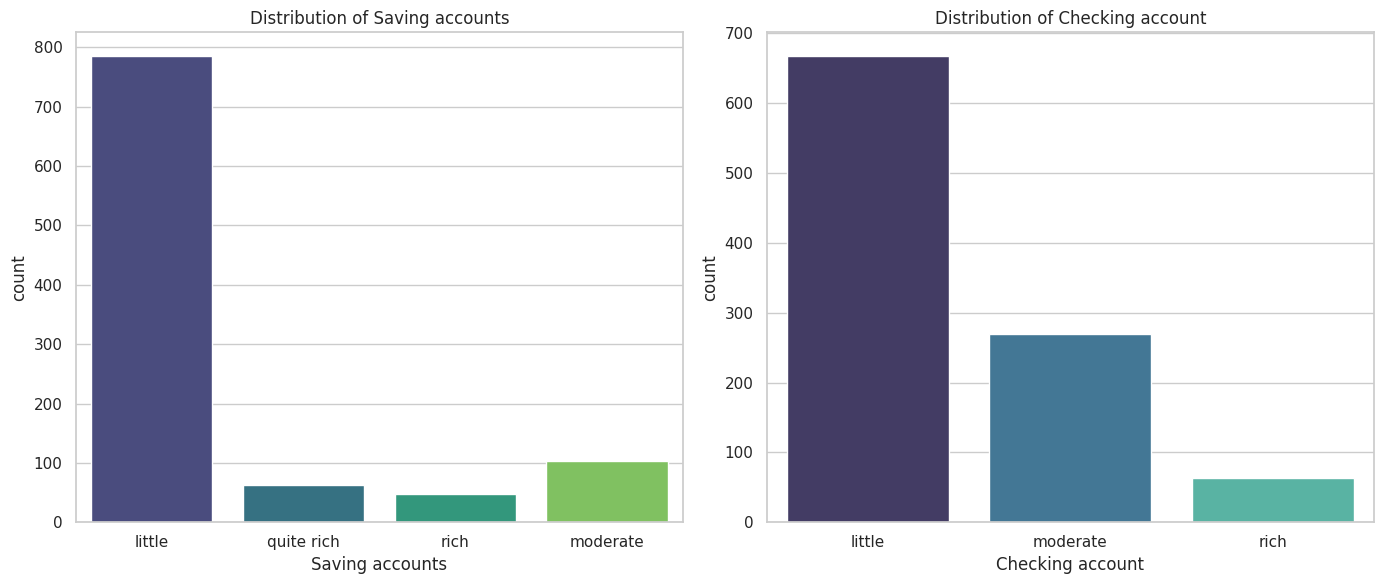

In [12]:
# Create count plots for 'Saving accounts' and 'Checking account'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Saving accounts', data=data, palette='viridis')
plt.title('Distribution of Saving accounts')

plt.subplot(1, 2, 2)
sns.countplot(x='Checking account', data=data, palette='mako')
plt.title('Distribution of Checking account')

plt.tight_layout()
plt.show()


**How can we visualize the distribution of 'Credit amount' across different 'Housing' types?**

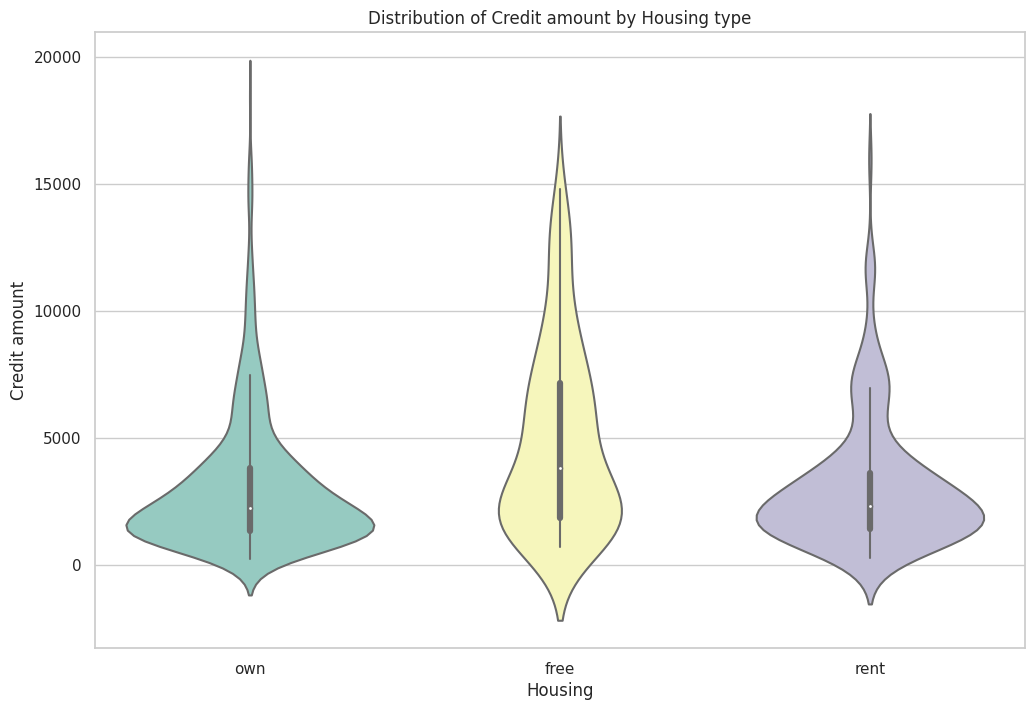

In [13]:
# Create a violin plot to visualize the distribution of 'Credit amount' across different 'Housing' types
plt.figure(figsize=(12, 8))
sns.violinplot(x='Housing', y='Credit amount', data=data, palette='Set3')
plt.title('Distribution of Credit amount by Housing type')
plt.xlabel('Housing')
plt.ylabel('Credit amount')
plt.show()


**How can we visualize the distribution of 'Credit amount' based on 'Job' categories?**

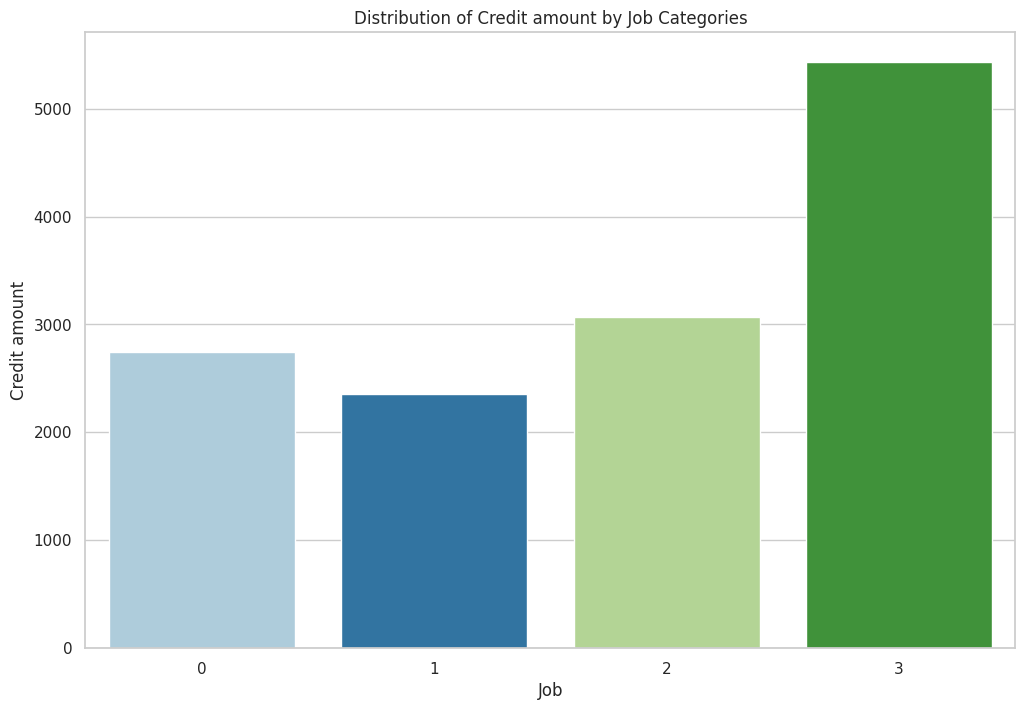

In [14]:
# Create a grouped bar plot to visualize the distribution of 'Credit amount' based on 'Job' categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Job', y='Credit amount', data=data, errorbar=None, palette='Paired')
plt.title('Distribution of Credit amount by Job Categories')
plt.xlabel('Job')
plt.ylabel('Credit amount')
plt.show()


**Can we examine the distribution of 'Duration' for different 'Purpose' categories?**

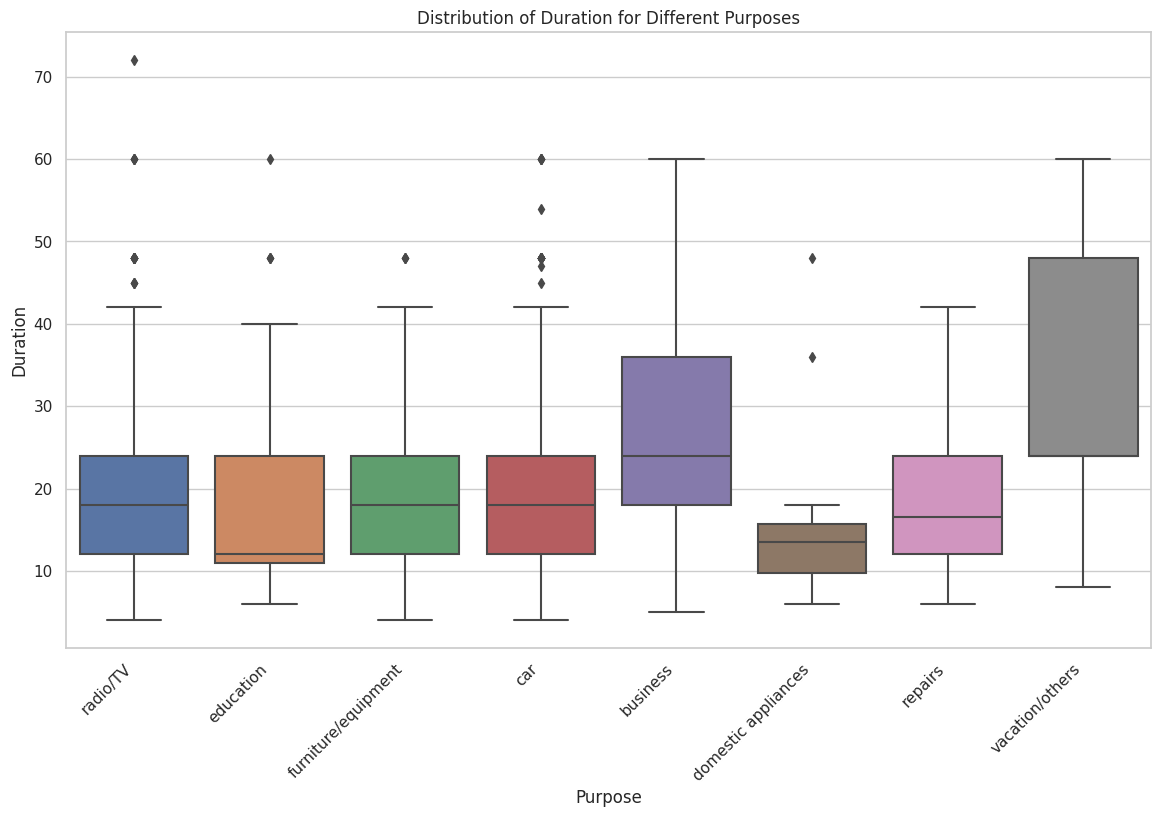

In [15]:
# Create a boxplot to visualize the distribution of 'Duration' for different 'Purpose' categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Purpose', y='Duration', data=data)
plt.title('Distribution of Duration for Different Purposes')
plt.xlabel('Purpose')
plt.ylabel('Duration')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we explore the correlation between numerical variables in the dataset?**

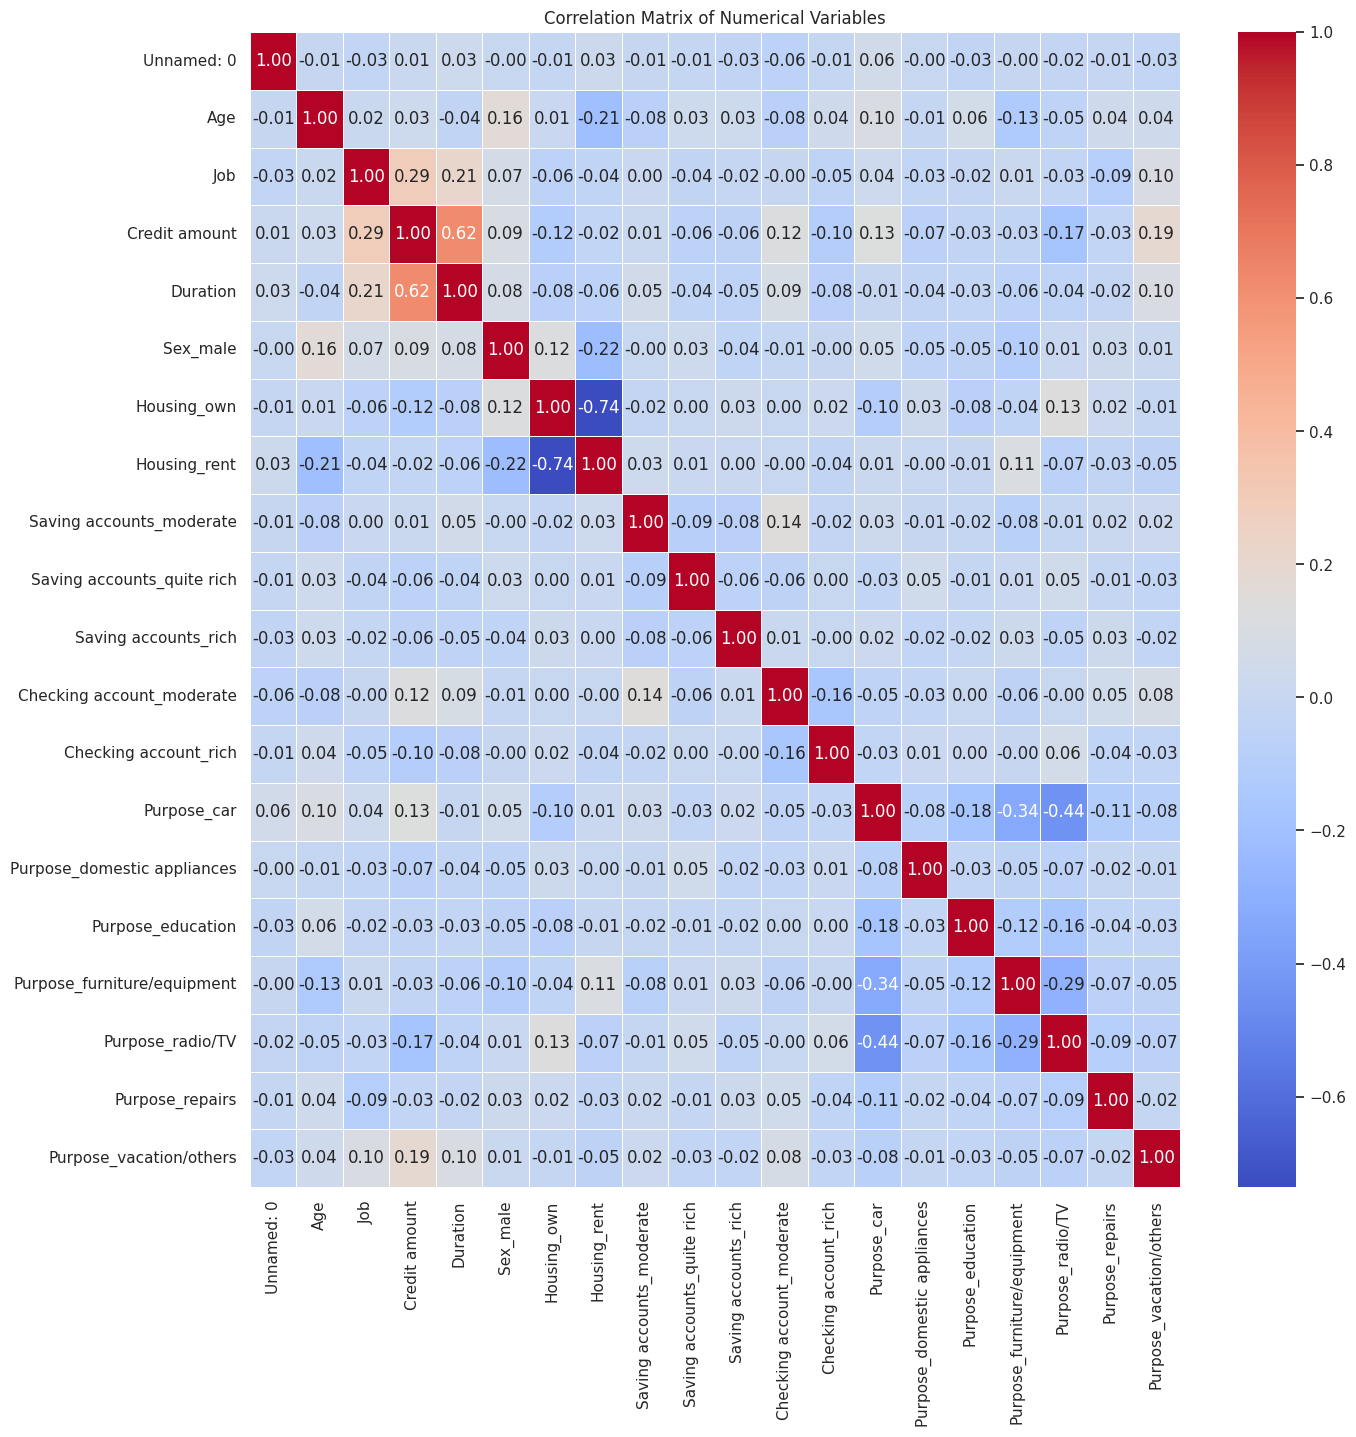

In [16]:
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)

# Calculate and visualize the correlation matrix
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



**How can we visualize the distribution of 'Credit amount' across different 'Saving accounts' and 'Checking account' categories?**

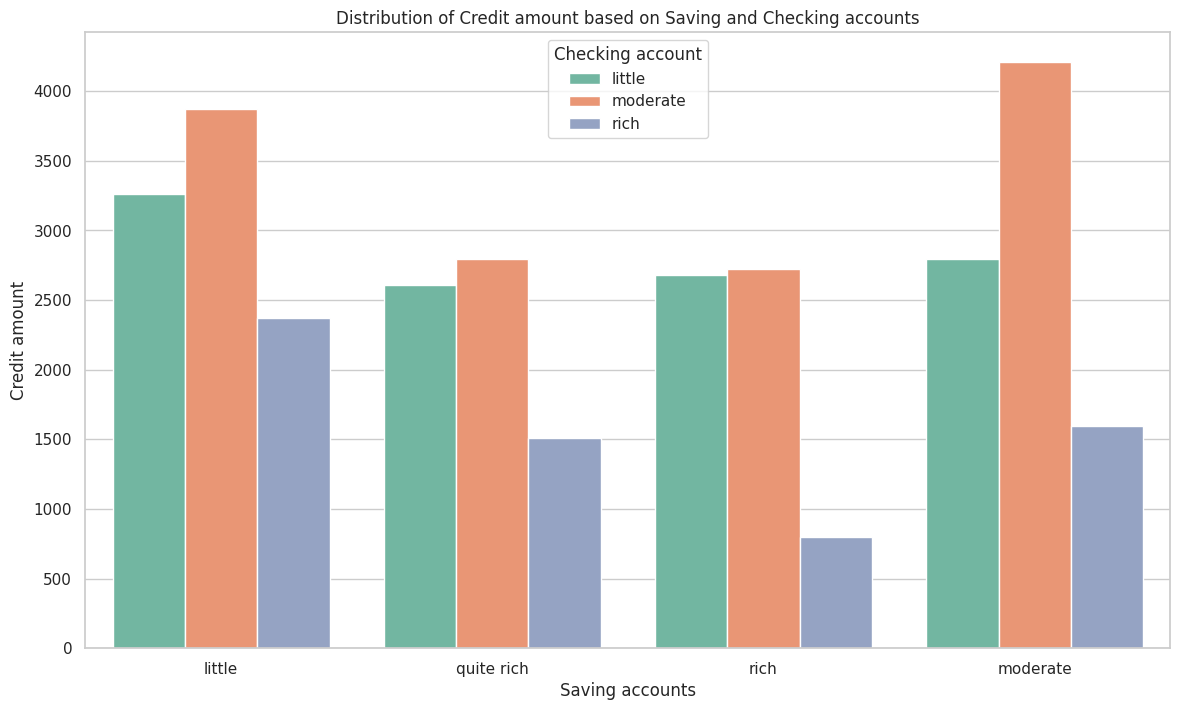

In [17]:
# Create a grouped bar plot to visualize the distribution of 'Credit amount' based on 'Saving accounts' and 'Checking account'
plt.figure(figsize=(14, 8))
sns.barplot(x='Saving accounts', y='Credit amount', hue='Checking account', data=data, errorbar=None, palette='Set2')
plt.title('Distribution of Credit amount based on Saving and Checking accounts')
plt.xlabel('Saving accounts')
plt.ylabel('Credit amount')
plt.show()


**Can we analyze the relationship between 'Credit amount' and 'Age' based on 'Sex'?**

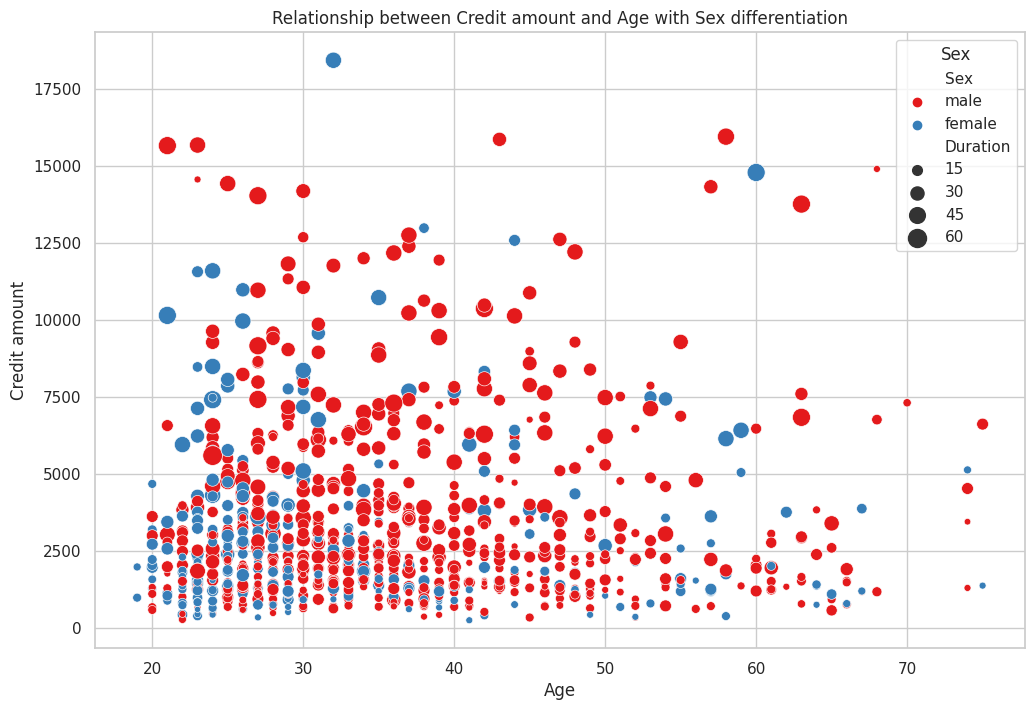

In [18]:
# Create a scatter plot to explore the relationship between 'Credit amount' and 'Age' with points colored by 'Sex'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Credit amount', data=data, hue='Sex', palette='Set1', size='Duration', sizes=(20, 200))
plt.title('Relationship between Credit amount and Age with Sex differentiation')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.legend(title='Sex', loc='upper right')
plt.show()


**How can we visualize the distribution of 'Credit amount' based on 'Saving accounts' and 'Housing' simultaneously?**

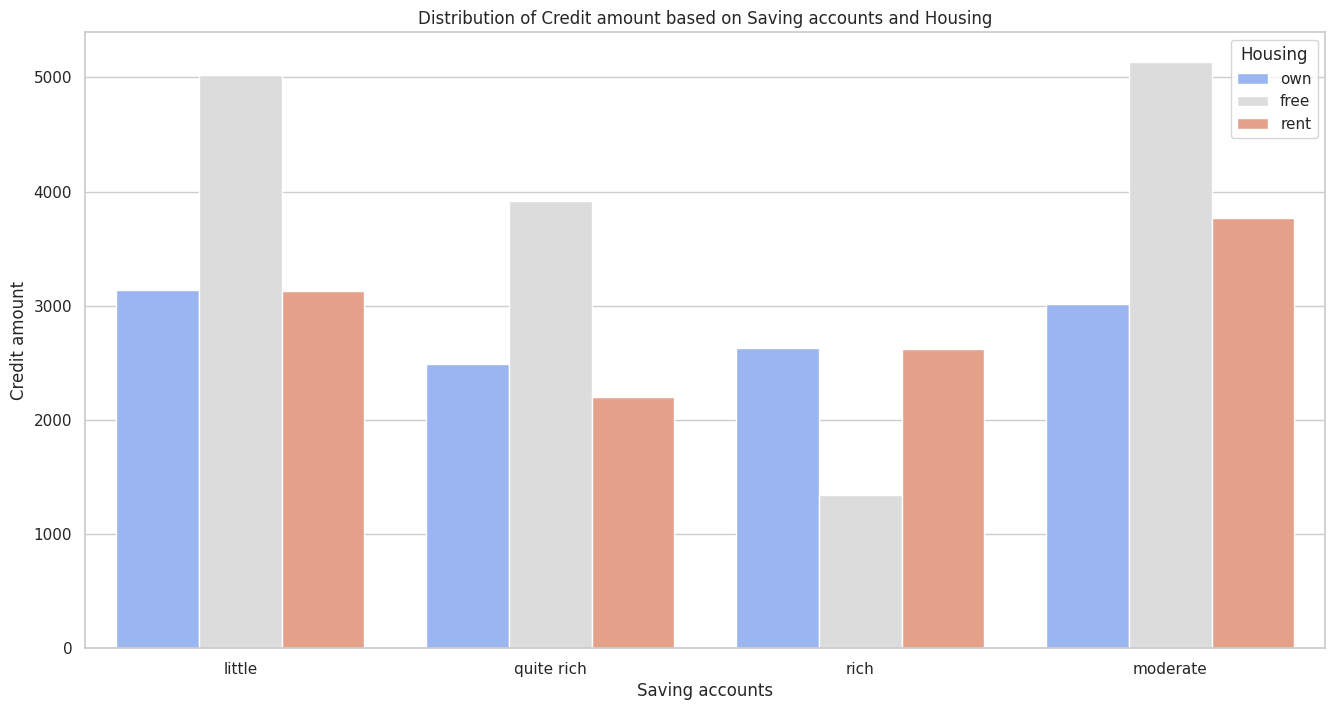

In [19]:
# Create a grouped bar plot to visualize the distribution of 'Credit amount' based on 'Saving accounts' and 'Housing'
plt.figure(figsize=(16, 8))
sns.barplot(x='Saving accounts', y='Credit amount', hue='Housing', data=data, errorbar=None, palette='coolwarm')
plt.title('Distribution of Credit amount based on Saving accounts and Housing')
plt.xlabel('Saving accounts')
plt.ylabel('Credit amount')
plt.show()


**How can we visualize the distribution of 'Credit amount' across different 'Purpose' categories with a swarm plot?**

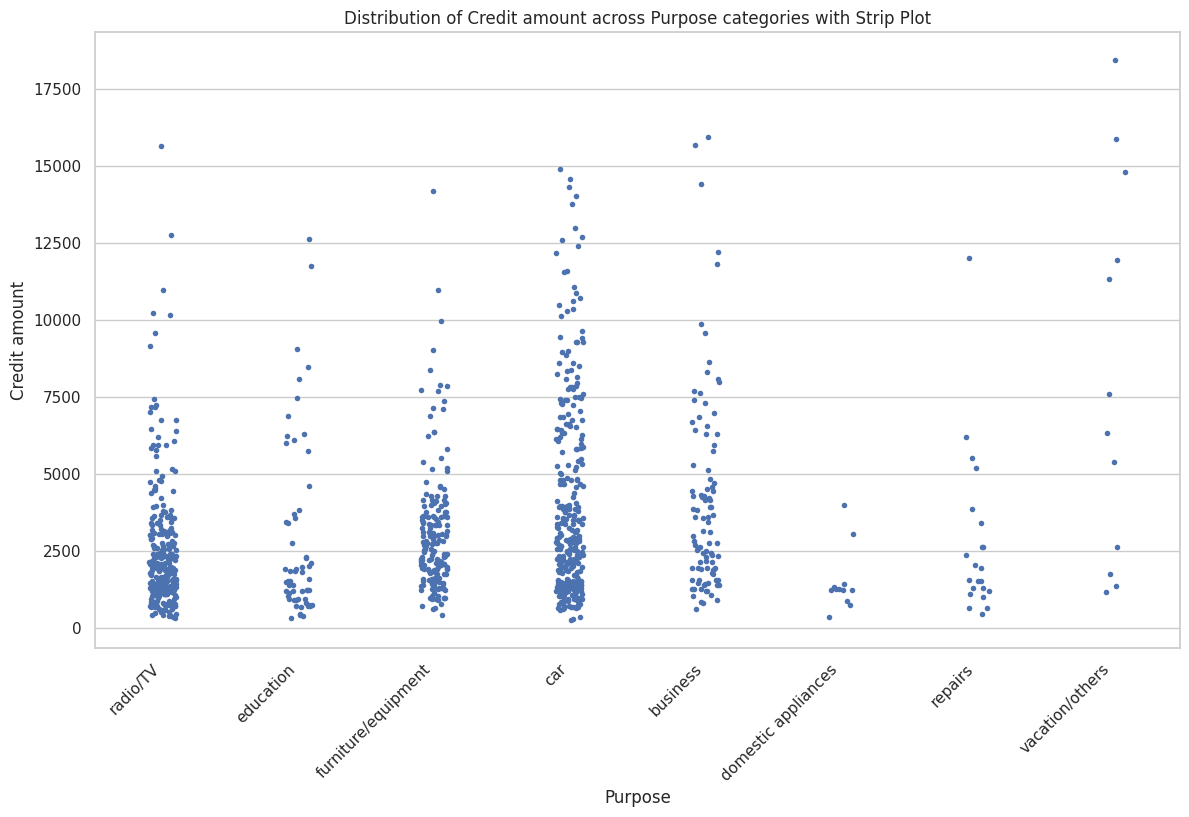

In [20]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='Purpose', y='Credit amount', data=data, size=4, jitter=True)
plt.title('Distribution of Credit amount across Purpose categories with Strip Plot')
plt.xlabel('Purpose')
plt.ylabel('Credit amount')
plt.xticks(rotation=45, ha='right')
plt.show()

**Can we analyze the distribution of 'Age' and 'Credit amount' simultaneously with a joint plot?**

<Figure size 1200x800 with 0 Axes>

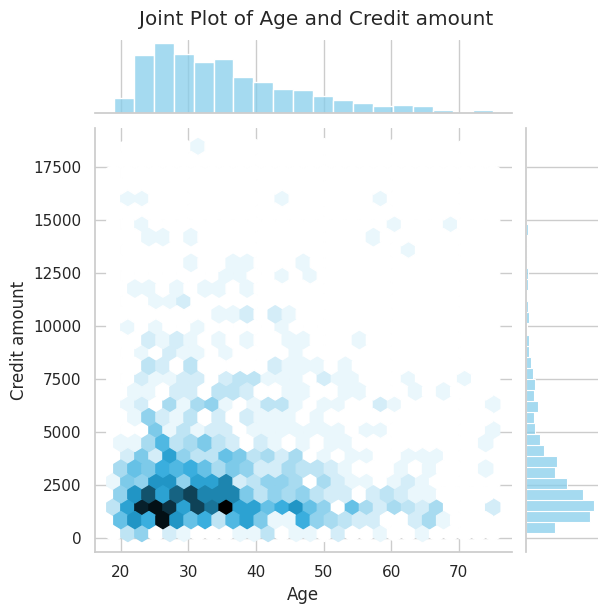

In [21]:
# Create a joint plot to analyze the distribution of 'Age' and 'Credit amount'
plt.figure(figsize=(12, 8))
sns.jointplot(x='Age', y='Credit amount', data=data, kind='hex', color='skyblue')
plt.suptitle('Joint Plot of Age and Credit amount', y=1.02)
plt.show()


**How can we examine the distribution of 'Job' categories based on 'Housing' types?**

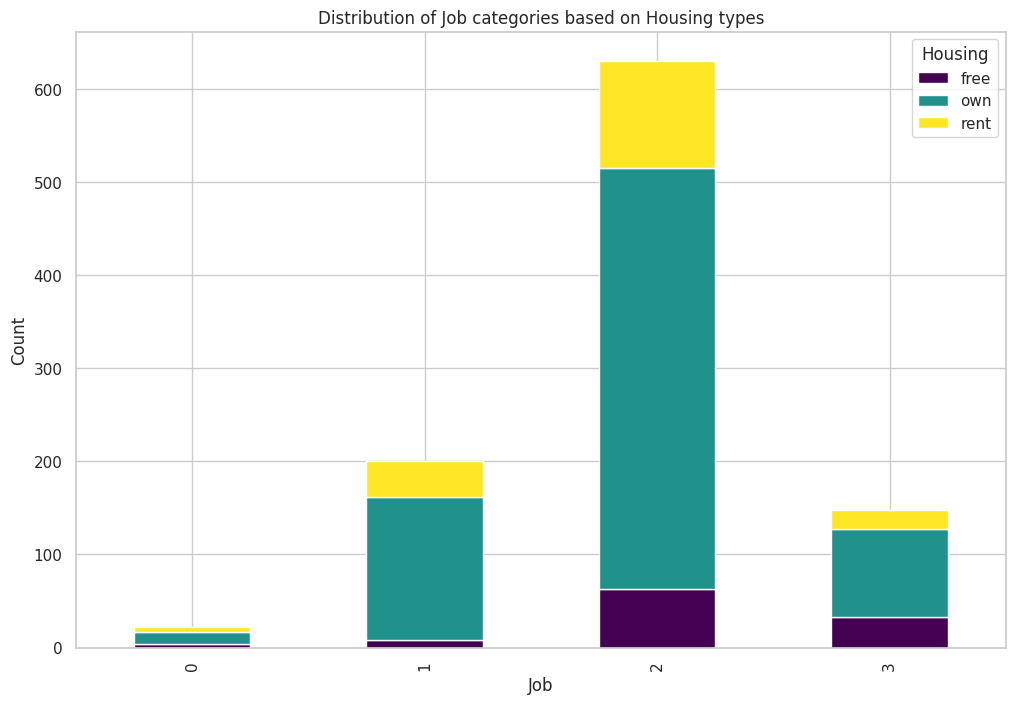

In [22]:
# Create a stacked bar plot to examine the distribution of 'Job' categories based on 'Housing' types
job_housing_counts = pd.crosstab(data['Job'], data['Housing'])
job_housing_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribution of Job categories based on Housing types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


**How can we visualize the spread of 'Credit amount' and 'Duration' using a 2D kernel density estimation plot?**

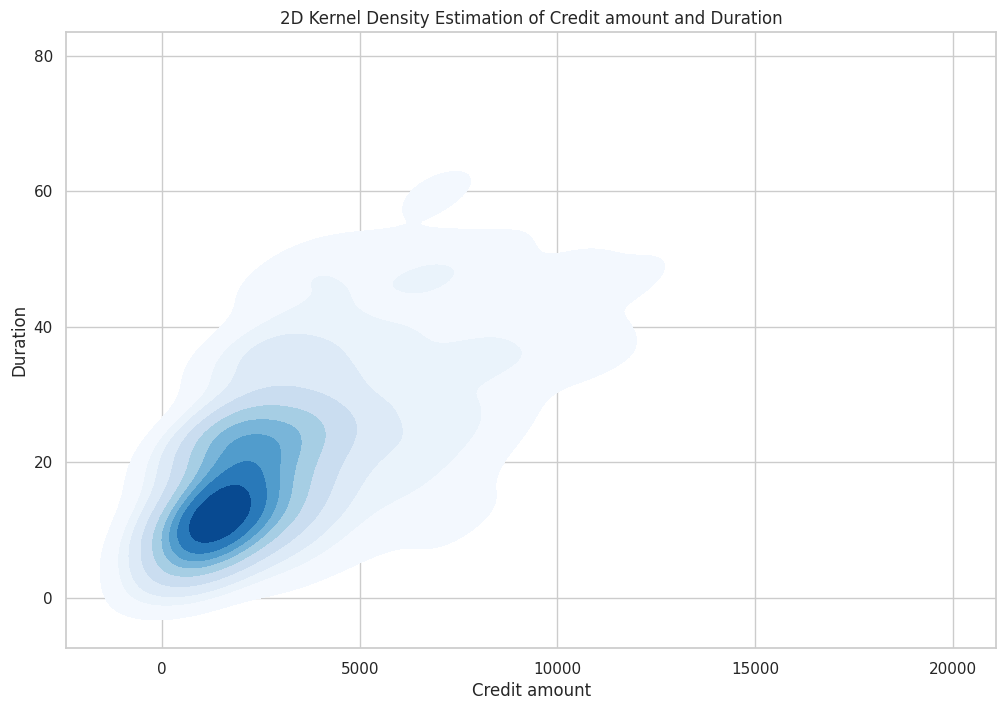

In [23]:
# Create a 2D kernel density estimation plot for 'Credit amount' and 'Duration'
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Credit amount', y='Duration', data=data, cmap='Blues', fill=True)
plt.title('2D Kernel Density Estimation of Credit amount and Duration')
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()
